# Spotify User Behavior Analysis

Problem Statement:  In the last quarter of 2023, Spotify completely changed the way it app functions. It no more allows even the basic features with its free version.  

Hence, this is a very new dataset from kaggle and thus I would like to present an analysis to understand if more people are willing to subscribe pertaining the feature restriction or the other way around.

In [1]:
pip install --upgrade seaborn



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
pip install pandas==1.3.3

  Using cached pandas-1.3.3.tar.gz (4.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "/priva

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel('Spotify_user_research.xlsx')
data.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,35~60,Others,More than 2 years,Smartphone,Family Plan-Rs 179/month,Yes,Family Plan-Rs 179/month,Podcast,Pop,Afternoon,Sadness or melancholy,Once a week,Recommendations,5,Daily,Comedy,NaN,NaN,Short (less than 15 minutes),Satisfied
1,20~35,Male,6 months to 1 year,Smart speakers or voice assistants,Family Plan-Rs 179/month,No,Family Plan-Rs 179/month,Podcast,Rock,Morning,Social gatherings or parties,Rarely,Recommendations,1,Once a week,Technology,Discussion,Both,Short (less than 15 minutes),Dissatisfied
2,12~20,Female,More than 2 years,Computer or laptop,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Morning,Relaxation and stress relief,Rarely,Recommendations,4,Several times a week,NaN,NaN,Both,Long (more than 30 minutes),Very Satisfied
3,12~20,Female,Less than 6 months,Computer or laptop,Student Plan-Rs 59/month,No,Individual Plan- Rs 119/month,Music,Rock,Night,Social gatherings or parties,Rarely,Playlists,5,Daily,NaN,NaN,Well known individuals,Medium (15-30 minutes),Satisfied
4,12~20,Male,1 year to 2 years,Smartphone,Individual Plan- Rs 119/month,Yes,NaN,Podcast,Pop,Evening,Social gatherings or parties,Once a week,Playlists,4,Rarely,NaN,Interview,Well known individuals,NaN,Very Satisfied


In [6]:
data.shape

(28546, 20)

In [7]:
data.isna().sum()

Age                               0
Gender                            0
spotify_usage_period              0
spotify_listening_device          0
spotify_subscription_plan         0
premium_sub_willingness           0
preffered_premium_plan         8073
preferred_listening_content       0
fav_music_genre                   0
music_time_slot                   0
music_Influencial_mood            0
music_lis_frequency               0
music_expl_method                 0
music_recc_rating                 0
pod_lis_frequency                 0
fav_pod_genre                  5395
preffered_pod_format           7347
pod_host_preference            7385
preffered_pod_duration         6918
pod_variety_satisfaction          0
dtype: int64

In [8]:
data['preffered_premium_plan'].fillna(0, inplace = True)

In [9]:
data['preffered_premium_plan'].value_counts()

preffered_premium_plan
0                                   8073
Student Plan-Rs 59/month            6375
Family Plan-Rs 179/month            6132
Individual Plan- Rs 119/month       4646
Duo plan- Rs Both9/month            1678
Individual Plan- Rs Both9/ month    1634
Family Plan-Rs 1Sports9/month          8
Name: count, dtype: int64

In [10]:
# Replacing the missing value with unknown to retain the sample size
data['fav_pod_genre'].fillna('Unknown', inplace=True)
data['preffered_pod_format'].fillna('Unknown', inplace=True)
data['pod_host_preference'].fillna('Unknown', inplace=True)
data['preffered_pod_duration'].fillna('Unknown', inplace=True)

In [11]:
# To print the total number of paid users
paid_plans = ['Family Plan-Rs 179/month', 'Student Plan-Rs 59/month', 'Individual Plan- Rs 119/month', 'Premium (paid subscription)']
plan_counts = data['spotify_subscription_plan'].value_counts()
total_paid_users = plan_counts[paid_plans].sum()
print(f'Paid users: {total_paid_users}')

#To print the total number of free users
free_counts = data.spotify_subscription_plan.value_counts().get('Free (ad-supported)')
print ('Unpaid Users:', free_counts)

print(f'Total Number of Users: {data.shape[0]}')


Paid users: 17267
Unpaid Users: 11279
Total Number of Users: 28546


In [12]:
data['spotify_subscription_plan'].value_counts()

spotify_subscription_plan
Free (ad-supported)              11279
Student Plan-Rs 59/month          4701
Family Plan-Rs 179/month          4670
Individual Plan- Rs 119/month     4590
Premium (paid subscription)       3306
Name: count, dtype: int64

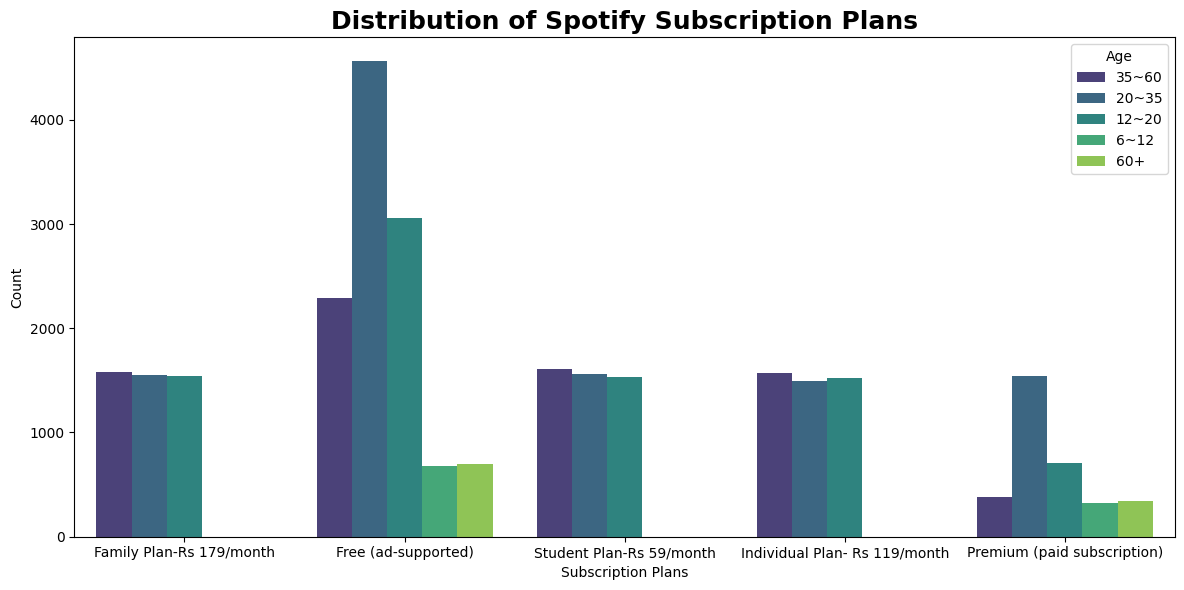

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='spotify_subscription_plan', hue ='Age', data=data, palette='viridis')
plt.title('Distribution of Spotify Subscription Plans', fontsize=18, fontweight='bold')
plt.xlabel('Subscription Plans')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

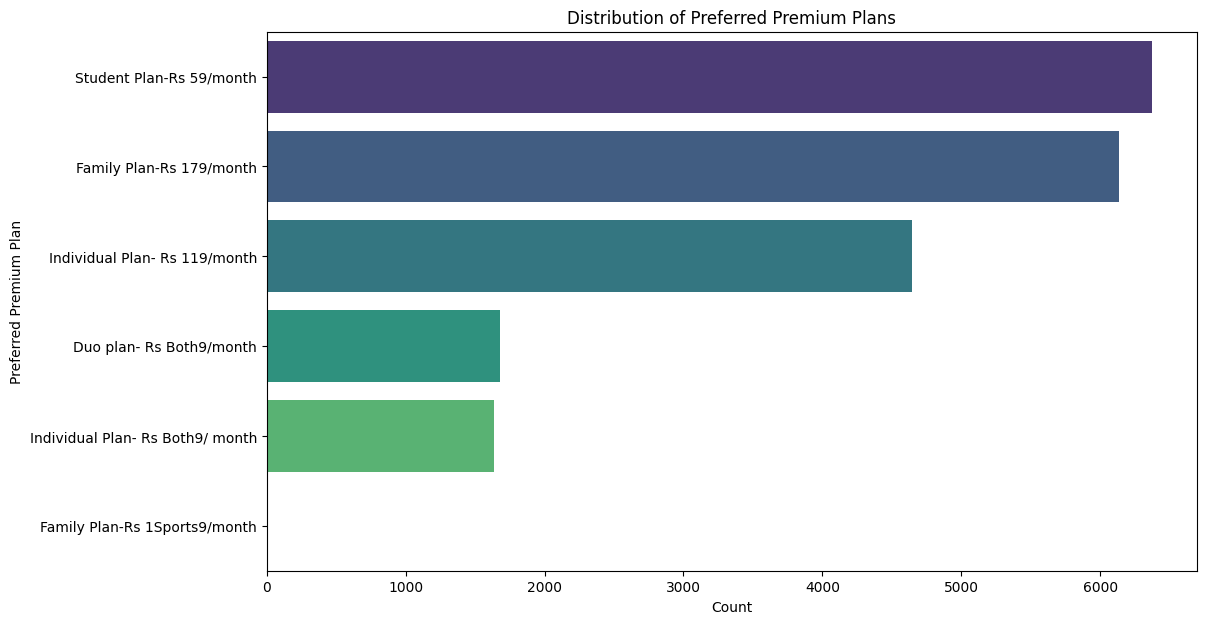

In [14]:
premium_plan_counts = data['preffered_premium_plan'].value_counts().reset_index()
premium_plan_counts.columns = ['preffered_premium_plan', 'count']

# Filter out the category '0'
premium_plan_counts = premium_plan_counts[premium_plan_counts['preffered_premium_plan'] != 0]

# Plotting the Horizontal Bar Plot without '0'
plt.figure(figsize=(12, 7))
sns.barplot(x='count', y='preffered_premium_plan', data=premium_plan_counts, palette='viridis')
plt.title('Distribution of Preferred Premium Plans')
plt.xlabel('Count')
plt.ylabel('Preferred Premium Plan')
plt.show()

Gender
Female    11164
Male      10913
Others     6469
Name: count, dtype: int64


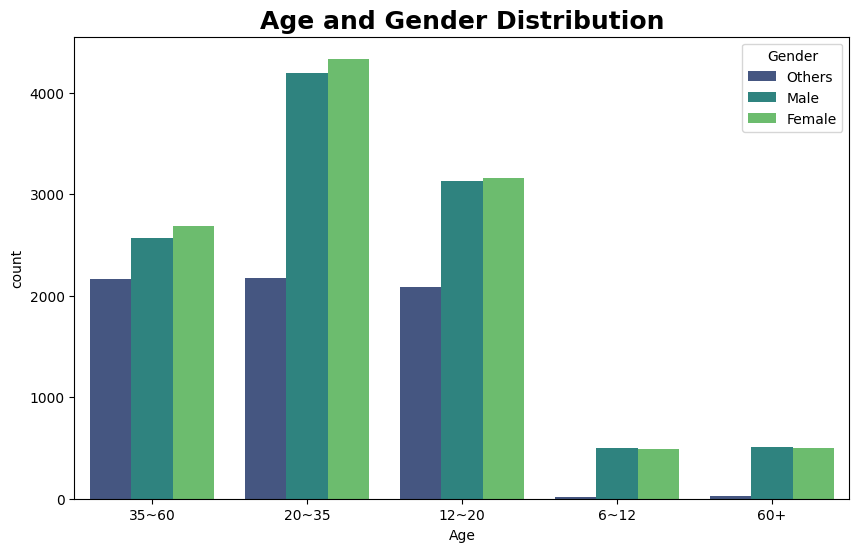

In [15]:
#Demographic Distribution
print(data.Gender.value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age', hue='Gender', palette='viridis')
plt.title('Age and Gender Distribution', fontsize=18, fontweight='bold')
plt.show()

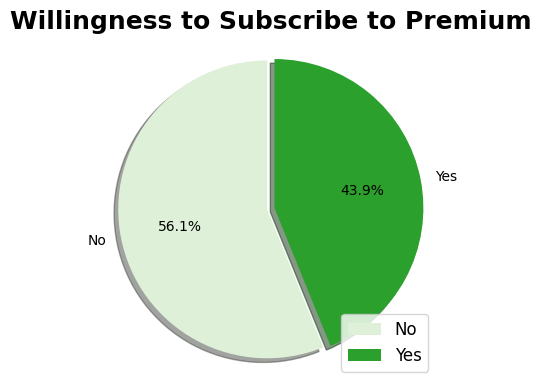

In [16]:
plt.figure(figsize=(4, 4))
colors = ['#DFF0D8', '#2CA02C']
data['premium_sub_willingness'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.05, 0], shadow=True, colors=sns.color_palette(colors))
plt.title('Willingness to Subscribe to Premium', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.legend(labels=data['premium_sub_willingness'].value_counts().index, loc='best', fontsize=12)  # Add legend
plt.ylabel('')
plt.tight_layout()
plt.show()

preferred_listening_content
Music      16779
Podcast    11767
Name: count, dtype: int64


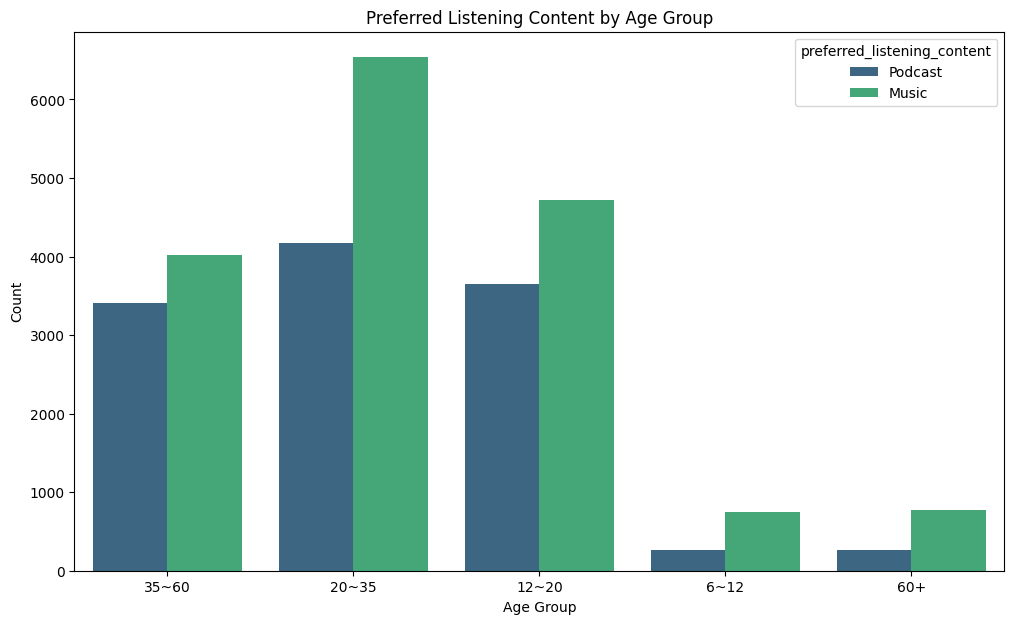

In [17]:
print(data['preferred_listening_content'].value_counts())
plt.figure(figsize=(12, 7))
sns.countplot(x='Age', hue='preferred_listening_content', data=data, palette='viridis')
plt.title('Preferred Listening Content by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

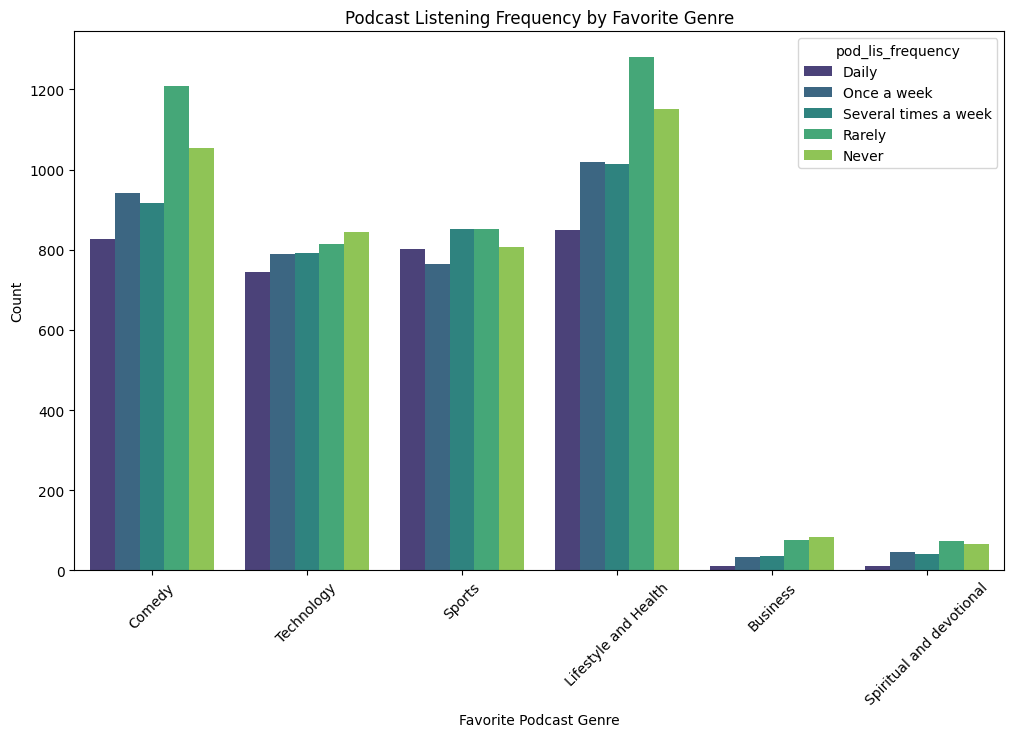

In [18]:
#Plotting few categories 
categories_to_plot = ['Comedy', 'Technology', 'Sports', 'Business', 'Lifestyle and Health', 'Food and Cooking', 'General Knowledge', 'Spiritual and devotional']

# Filter the DataFrame to include only the specified categories
filtered_data = data[data['fav_pod_genre'].isin(categories_to_plot)]

# Plotting the filtered DataFrame
plt.figure(figsize=(12, 7))
sns.countplot(x='fav_pod_genre', hue='pod_lis_frequency', data=filtered_data, palette='viridis')
plt.title('Podcast Listening Frequency by Favorite Genre')
plt.xlabel('Favorite Podcast Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

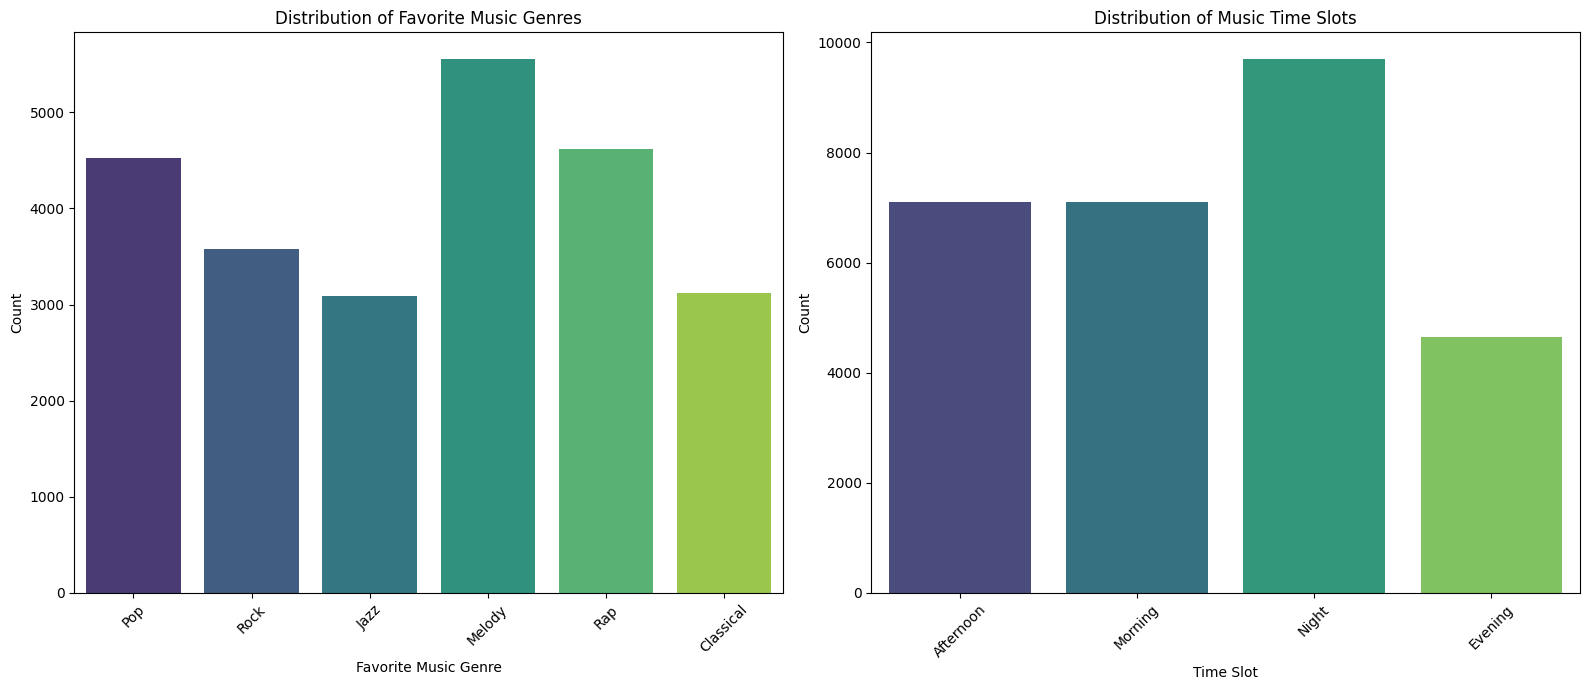

In [19]:
# Filter data for specific genres
genres_to_plot = ['Pop', 'Rock', 'Jazz', 'Melody', 'Rap', 'Classical']
filtered_data = data[data['fav_music_genre'].isin(genres_to_plot)]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# Plot 1: Bar plot for fav_music_genre
sns.countplot(x='fav_music_genre', data=filtered_data, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Favorite Music Genres')
axes[0].set_xlabel('Favorite Music Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Stacked bar plot for music_time_slot
sns.countplot(x='music_time_slot', data=data, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Music Time Slots')
axes[1].set_xlabel('Time Slot')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Insights Uncovered

1. Despite 60% of current users being subscribers, there is observed low subscription willingness based on recent analysis.

2. Among paid users, the student plan represents the highest adoption rate at 27%.

3. Females aged between 20 and 35 constitute 39% of the total sample population.

4. Music listening is preferred over podcasts by 58% across all age groups.

5. The Melody genre is the most favored music genre, with a preference for nighttime listening among the majority of users.

6. Podcast genres, particularly lifestyle and health, receive the highest daily engagement, while others exhibit mixed reviews.